### Jonathon Hayes

# Chloropleths
Chloropleths are thematic maps that are used to show statistical imformation in a visual way. An example would be a map of the US during election time when counties are shaded blue or red based on majority vote in those counties. The way the information is conveyed in this manner makes it very clear, to the reader, what is going on in the system.  

Ever since I was young I've tried to be environmentally conscious, which has lead me to reading about environmental damage that occurs in the US (and the World). For This specific chloropleth I decided to look at air quaility in the USA over 40 years, starting with 1987 to 2017. The data I used was gathered by the Environmental Protection Agency found here.

https://www.epa.gov/outdoor-air-quality-data

This website has pollution data going back to the 1980, which I think is kind of odd considering the Clean Air Act was create in 1955. Anyway, one issue that I came upon with the data is that it said It was broken up by county, which perfectly fit my needs, but after doing a lot of data extraction work I realized that some of the data was broken up by county while a lot was broken up by city. Considering the amount of data that were cities I was unable to match them to their appropriate counties. Nevertheless, enough regions (except Alaska) where correct to where I could get an accurate representation of the pollution in the United States. 

The basic idea when measuring for air pollution is pollutants in the air. According to the AirNow.gov website, the six major pollutants are ground-level ozone, particle pollution (also known as particulate matter), carbon monoxide, sulfur dioxide, and nitrogen dioxide. According to their research, ground-level ozone and particle pollution are the main threats to human health. 

## Setup
The data is presented in a standard csv file with information segmented in essentially two parts, a basic healthy to unhealthy status of the air and concentration of pollutants in the air. presented in a python list it looks like


In [1]:
from lxml import etree #to parse xml
import csv
dataDump = []
with open('annual_aqi_by_county_2017.csv', newline='') as csvfile:   #extract data
    for i in csvfile:
        rawData = i.split(',')
        dataDump.append(rawData)   #list of lists, makes stripping the data more clear
dataDump[0]

['State',
 'County',
 'Year',
 'Days with AQI',
 'Good Days',
 'Moderate Days',
 'Unhealthy for Sensitive Groups Days',
 'Unhealthy Days',
 'Very Unhealthy Days',
 'Hazardous Days',
 'Max AQI',
 '90th Percentile AQI',
 'Median AQI',
 'Days CO',
 'Days NO2',
 'Days Ozone',
 'Days SO2',
 'Days PM2.5',
 'Days PM10\r\n']

The first list in this data set is the headings for each data column. We'll be working with the moderate to hazardous days data because it shows, relatively, the safety of the air of the United States. Here's a picture that breaks up the different categories.

Populating the interactive namespace from numpy and matplotlib


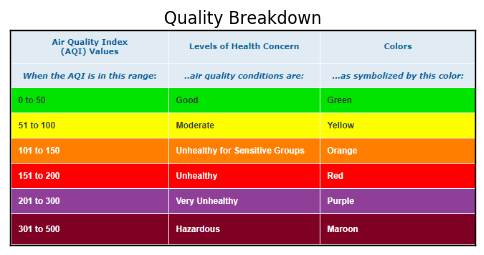

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('quality.png')
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Quality Breakdown')
plt.show()

Since we don't need the last few columns of data lets just remove them while also removing the year column because its a little redundant. We'll also be getting the ratio of each type of condition against the amount of days tested, which will be explained better down below. 

In [3]:
refinedData = [] #hold the refined data
for i in range(1, len(dataDump)):
    place= dataDump[i]  #placeholder for the iterated list
    collector = [] #a list to collect the data
    collector.append(place[0])
    collector.append(place[1])
    for j in range(4,10):
        collector.append(int(place[j])/int(place[3]))
    refinedData.append(collector)

The plan of attack is to present all the data for when the air quality was considered good for all counties that we have data on. I was thinking about actually pooling together all the data into one value, by weighting everything, but considering the number of days recorded for each county differs it might lead to a non accurate representation of the data. Also I couldn't really think of an effect way to wieght the data. Since we are making a chloropleth we need to create functions for the creation of hexadecimal colors. The two functions are as follows

In [4]:
def foo(x): return hex( min(255,int(x*256)) )[2:].zfill(2) #convert 0-1 -> 0-255 -> hexadecimal
def goo(r,g,b): return '#'+foo(r)+foo(g)+foo(b) #consolidate the converter

To retreive the color map, my plan is to fix two of the three rgb values, this way we can just focus on one to shift up and down. To get this shift I'm going to take a ratio of the number of good days divided by the total days, this way it'll already be between zero and one. Since we want each type to have a different color scheme we need to manually input each one. We'll create the final lists by iterating over each value and assigning the hexadecimal color value


In [5]:
finalnewlist = []
for i in range(0,len(refinedData)):
    newlst = []
    hello = refinedData[i]
    newlst.append(hello[0])
    newlst.append(hello[1])
    newlst.append(goo(hello[2],.8,.8)) #faint blue to faint red
    newlst.append(goo(.2,hello[3],.5))  #purple to light green
    newlst.append(goo(.45,.45,hello[4])) #brown yellow to mid-light blue
    newlst.append(goo(hello[5],.3,.9))  #dark blue to pink
    newlst.append(goo(.1,hello[6],.3))  #black blue to neon green
    newlst.append(goo(.1,.1,hello[7])) #black to neon blue
    finalnewlist.append(newlst)

We have everything in place and now just need to apply it to the svg file to see the results. 
## Applying the Data to the SVG File
For this we need to understand the format of the svg file and specifically our svg file. The svg file has 6 subelements to run through, but the important one is the $<g>$ element. For clearity I'll put the first few lines in a code cell

In [6]:
'''
<svg xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://web.resource.org/cc/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:svg="http://www.w3.org/2000/svg" xmlns="http://www.w3.org/2000/svg" version="1.0" width="555.221" height="351.667" id="svg9559">
  <metadata id="metadata3671">
    <rdf:RDF>
      <cc:Work rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <defs id="defs9561"/>
  <g id="stylegroup" style="fill:#d0d0d0;fill-rule:nonzero;stroke:#000000;stroke-width:0.1">
    <path id="02185" d="M 62.678,259.312 L 63.560,258.431 L 64.220,257.991 L 64.439,258.431 L 64.000,258.651 L 64.439,258.651 L 66.643,257.991 L 68.626,255.566 L 70.388,256.448 L 70.388,256.890 L 69.727,257.549 L 69.727,258.212 L 70.388,257.991 L 70.829,256.890 L 71.269,256.448 L 71.930,257.108 L 72.150,257.991 L 72.811,258.212 L 73.030,257.771 L 74.131,257.549 L 75.894,257.549 L 76.113,257.771 L 75.673,258.431 L 75.673,258.651 L 76.996,258.872 L 76.774,259.532 L 77.656,259.532 L 78.757,258.872 L 81.180,258.651 L 82.722,259.092 L 83.386,259.092 L 84.044,259.312 L 84.267,259.532 L 85.148,259.532 L 86.249,259.312 L 87.572,259.312 L 89.114,259.754 L 89.554,259.532 L 90.436,258.872 L 90.655,258.651 L 91.096,258.212 L 92.639,258.431 L 96.163,259.532 L 97.264,263.058 L 97.925,265.261 L 88.893,267.464 L 89.334,269.886 L 87.572,270.327 L 82.945,271.211 L 82.722,271.211 L 72.371,272.311 L 69.947,272.311 L 69.947,271.870 L 68.186,271.870 L 68.186,271.429 L 66.423,271.429 L 64.661,271.649 L 63.338,271.649 L 63.338,271.211 L 62.678,271.211 L 62.678,271.429 L 60.696,271.429 L 60.255,271.211 L 60.034,271.211 L 60.034,271.429 L 59.154,271.429 L 58.932,270.989 L 57.831,270.989 L 57.831,271.429 L 57.389,271.429 L 54.304,271.211 L 54.304,272.089 L 52.762,272.089 L 51.441,271.429 L 50.780,270.547 L 51.220,269.227 L 51.441,267.683 L 52.983,267.905 L 54.967,267.683 L 55.626,267.464 L 56.948,265.921 L 57.611,263.939 L 58.932,261.957 L 59.814,261.074 L 60.474,261.297 L 61.356,260.855 L 62.678,259.312" fill="#ffffff">
      <title id="t0">North Slope, AK</title></path>
    <path id="02188" d="M 74.350,278.699 L 73.911,278.699 L 73.030,279.139 L 73.251,279.580 L 71.930,279.580 L 71.930,280.901 L 71.048,281.122 L 71.048,280.682 L 70.608,280.243 L 69.727,280.243 L 69.727,281.122 L 68.845,281.122 L 68.845,280.243 L 67.084,280.243 L 67.084,282.225 L 64.881,282.225 L 64.881,283.105 L 63.560,283.105 L 63.560,285.308 L 63.119,285.308 L 63.119,285.750 L 62.678,285.750 L 54.967,285.529 L 54.967,284.647 L 54.745,284.647 L 54.526,284.427 L 54.526,283.767 L 54.085,283.546 L 54.085,281.784 L 53.863,279.580 L 54.745,279.580 L 55.186,279.800 L 54.745,281.342 L 54.967,282.225 L 58.932,282.663 L 60.034,281.563 L 60.696,281.563 L 60.474,281.122 L 59.814,280.682 L 59.154,280.243 L 58.269,279.139 L 57.831,278.920 L 57.611,278.259 L 57.831,278.038 L 58.269,278.038 L 58.932,279.580 L 59.814,280.461 L 60.255,280.243 L 59.814,280.022 L 59.154,279.139 L 59.594,277.818 L 59.814,278.038 L 59.814,277.818 L 59.154,277.378 L 58.052,277.597 L 57.169,277.597 L 55.626,276.937 L 54.967,274.514 L 52.762,272.089 L 54.304,272.089 L 54.304,271.211 L 57.389,271.429 L 57.831,271.429 L 57.831,270.989 L 58.932,270.989 L 59.154,271.429 L 60.034,271.429 L 60.034,271.211 L 60.255,271.211 L 60.696,271.429 L 62.678,271.429 L 62.678,271.211 L 63.338,271.211 L 63.338,271.649 L 64.661,271.649 L 66.423,271.429 L 68.186,271.429 L 68.186,271.870 L 69.947,271.870 L 69.947,272.311 L 71.710,272.311 L 71.710,273.412 L 72.150,273.412 L 72.150,273.853 L 73.030,274.735 L 73.030,276.055 L 73.911,276.055 L 74.350,276.496 L 74.572,277.818 L 74.350,278.699" fill="#ffffff">
      <title id="t1">Northwest Arctic, AK</title></path>
''';

I only showed the first two elemtents of the $<g>$ tag since its the same form for the rest of the file. My plan is to take the first two values of any given list in the final data set and compare it to the name of each county and state combination. It's not the most efficient way to do things but I'm not sure what else to do. We also need to define a reset function becuase we are actually writing to the svg file. If we didnt reset we'd have some errors potentially with inaccurate values for certain counties. 

In [7]:
def resetMap(z):
    from lxml import etree #parse the svg
    with open(z) as f: 
        tree = etree.parse(f)
        root = tree.getroot()
        for stuff in root[2]:
            stuff.set("fill", "#ffffff")# fill = white
    return tree.write(z)
def search(lst,z,des):   #list in question, the svg file, the specific ratio in the given list
    from lxml import etree #parse
    with open(z) as f: 
            tree = etree.parse(f)
            root = tree.getroot()
    for item in lst:
        stringSearch = item[1] + ', '+ item[0] #concatinate strings
        for i in range(0, len(root[2])):
            if stringSearch == root[2][i][0].text:  #compare strings to find a match
                root[2][i].set("fill", item[des] )  #set appropriate color scheme
    return tree.write(z)  #writes the data to the svg file

Finally we can look at some data, which we'll start with days with good air quality over the course of 2017.

Ratio of Good Days to Total Days, 2017

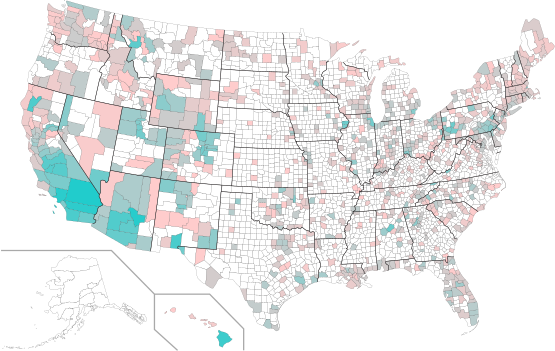

In [8]:
search(finalnewlist,'USA.svg', 2)
from IPython.display import SVG, display,Markdown
display(Markdown("Ratio of Good Days to Total Days, 2017"))
display(SVG('USA.svg')) 

I couldn't find a proper title object to display for this data set so I had to go with a markdown display. The color scheme for this category is light blue is a low air quality, then the color transitions to a grey then to a pink which indicated a healthy air quality. Anyway, Looking at the data we can see that southern california has the most polluted air compared to the rest of the United States, given the data that we have. Other than that we can see pockets or blue on the East coast as well. I'd assume that New York City's air would be a lot worse given the population, but it seems to be pretty average. Looking at hawaii, they also have pretty bad air, on one island, the main island, but the others have fairly good air. Accroding to the EPA, a lot of the pollutants come from automobiles, factories and electrical facilities outputting chemicals that cause an increase in ground-level ozone and pollutant particles. Looking at San Bernardino county in California, we can see it has one of the worst air qualities of 2017 with a ratio of good days to all days of .13. Looking at their population, its 2.1 million, which is definitely large and clearly a factor, but I couldn't find any alarming reasons why they'd have such a poor air quality. This is a good start, but seeing the progress over the passed fourty years might be better to see the progress (or regress). 

## Gathering Data from 1987 - 2007
We just need to go through the same approach since the files are layed out identically. Since we are using the same singular svg file we'll have to create 3 separate code blocks of this data manipulation, which will making the formatting a little frustrating. 

Ratio of Good Days to Total Days, 2007

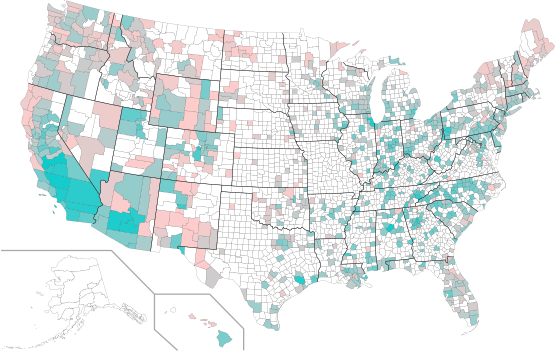

In [14]:
from lxml import etree #to parse xml
import csv
dataDump = []
finalList = []
with open('annual_aqi_by_county_2007.csv', newline='') as csvfile:   #extract data
    for i in csvfile:
        rawData = i.split(',')
        dataDump.append(rawData)   #list of lists, makes stripping the data more clear
refinedData = [] #hold the refined data
for i in range(1, len(dataDump)):
    place= dataDump[i]  #placeholder for the iterated list
    collector = [] #a list to collect the data
    collector.append(place[0])
    collector.append(place[1])
    for j in range(4,10):
        collector.append(int(place[j])/int(place[3]))
    refinedData.append(collector)
    finalList = []
for i in range(0,len(refinedData)):
    newlst = []
    hello = refinedData[i]
    newlst.append(hello[0])
    newlst.append(hello[1])
    newlst.append(goo(hello[2],.8,.8)) #faint blue to faint red
    newlst.append(goo(.2,hello[3],.5))  #purple to light green
    newlst.append(goo(.45,.45,hello[4])) #brown yellow to mid-light blue
    newlst.append(goo(hello[5],.3,.9))  #dark blue to pink
    newlst.append(goo(.1,hello[6],.3))  #black blue to neon green
    newlst.append(goo(.1,.1,hello[7])) #black to neon blue
    finalList.append(newlst)
resetMap('USA.svg')
search(finalList,'USA.svg', 2)
from IPython.display import SVG, display,Markdown
display(Markdown("Ratio of Good Days to Total Days, 2007"))
display(SVG('USA.svg')) 

Ratio of Good Days to Total Days, 1997

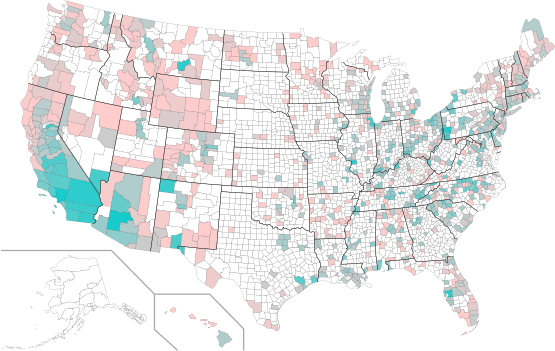

In [15]:
from lxml import etree #to parse xml
import csv
dataDump = []
with open('annual_aqi_by_county_1997.csv', newline='') as csvfile:   #extract data
    for i in csvfile:
        rawData = i.split(',')
        dataDump.append(rawData)   #list of lists, makes stripping the data more clear
refinedData = [] #hold the refined data
for i in range(1, len(dataDump)):
    place= dataDump[i]  #placeholder for the iterated list
    collector = [] #a list to collect the data
    collector.append(place[0])
    collector.append(place[1])
    for j in range(4,10):
        collector.append(int(place[j])/int(place[3]))
    refinedData.append(collector)
    finalList = []
for i in range(0,len(refinedData)):
    newlst = []
    hello = refinedData[i]
    newlst.append(hello[0])
    newlst.append(hello[1])
    newlst.append(goo(hello[2],.8,.8)) #faint blue to faint red
    newlst.append(goo(.2,hello[3],.5))  #purple to light green
    newlst.append(goo(.45,.45,hello[4])) #brown yellow to mid-light blue
    newlst.append(goo(hello[5],.3,.9))  #dark blue to pink
    newlst.append(goo(.1,hello[6],.3))  #black blue to neon green
    newlst.append(goo(.1,.1,hello[7])) #black to neon blue
    finalList.append(newlst)
resetMap('USA.svg')
search(finalList,'USA.svg', 2)
from IPython.display import SVG, display,Markdown
display(Markdown("Ratio of Good Days to Total Days, 1997"))
display(SVG('USA.svg')) 

Ratio of Good Days to Total Days, 1987

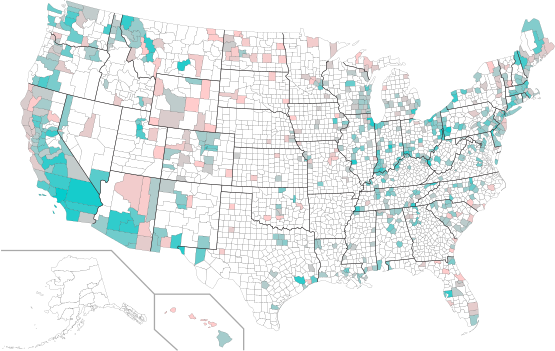

In [16]:
from lxml import etree #to parse xml
import csv
dataDump = []
with open('annual_aqi_by_county_1987.csv', newline='') as csvfile:   #extract data
    for i in csvfile:
        rawData = i.split(',')
        dataDump.append(rawData)   #list of lists, makes stripping the data more clear
refinedData = [] #hold the refined data
for i in range(1, len(dataDump)):
    place= dataDump[i]  #placeholder for the iterated list
    collector = [] #a list to collect the data
    collector.append(place[0])
    collector.append(place[1])
    for j in range(4,10):
        collector.append(int(place[j])/int(place[3]))
    refinedData.append(collector)
    finalList = []
for i in range(0,len(refinedData)):
    newlst = []
    hello = refinedData[i]
    newlst.append(hello[0])
    newlst.append(hello[1])
    newlst.append(goo(hello[2],.8,.8)) #faint blue to faint red
    newlst.append(goo(.2,hello[3],.5))  #purple to light green
    newlst.append(goo(.45,.45,hello[4])) #brown yellow to mid-light blue
    newlst.append(goo(hello[5],.3,.9))  #dark blue to pink
    newlst.append(goo(.1,hello[6],.3))  #black blue to neon green
    newlst.append(goo(.1,.1,hello[7])) #black to neon blue
    finalList.append(newlst)
resetMap('USA.svg')
search(finalList,'USA.svg', 2)
from IPython.display import SVG, display,Markdown
display(Markdown("Ratio of Good Days to Total Days, 1987"))
display(SVG('USA.svg')) 

There a very subtle change over the fourty years, but it seems that most counties have the same annual air pollution. I'm really not sure why this is the case though because I would have assumed there'd be some change that would have happened over that time period. Considering automobiles have already been cemented into everyday life and there hasn't been any drastic societial changes I guess I have to believe the data. One thing to notice is the it is slightly getting better in counties like Mohave Nevada and Warren Pennsylvannia and all around it seems like its approaching a pink tone. Looking in Hawaii, volcanos actually do affect the air quality a lot and might be a key reason they consistantly have poor air quality. 

## Conclusion
After a deep dive into the air quality data provided by the EPA, we we're able to see the quality of the air all over the United States. As for the other qualities like moderate, unhealthy, etc It didn't add anything new to the map. Counties with blue-ish hue in the ratio of good to total days had more unhealthy and moderate days than ones of a pink hue, which you could have guessed already. After doing outside research, data shows a lot of the pollution comes from cars, buses, etc along with factories which makes sense. 

## Sources

https://www.epa.gov/ozone-pollution

https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information